In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def apply_matrix2d_d(p0, warp, twist, inc_, PA_):
    inc_ = 0
    x = p0[:, :, 0]
    y = p0[:, :, 1]
    z = p0[:, :, 2]

    plt.pcolor(x, y, z)
    plt.title("z apply matrix input")
    plt.colorbar()
    plt.show()


    warp = warp[:, None]
    print("warp.shape" + str(warp.shape))
    twist = twist[:, None]
    print("twist.shape" + str(twist.shape))

    cosw = np.cos(warp)
    sinw = np.sin(warp)

    cost = np.cos(twist)
    sint = np.sin(twist)

    cosPA = np.cos(PA_)
    sinPA = np.sin(PA_)

    cosi = np.cos(inc_)
    sini = np.sin(inc_)

    xp = x*(-sinPA*sint*cosi + cosPA*cost) + y*((-sinPA*cosi*cost - sint*cosPA)*cosw + sinPA*sini*sinw) + z*(-(-sinPA*cosi*cost - sint*cosPA)*sinw + sinPA*sini*cosw)
    yp = x*(sinPA*cost + sint*cosPA*cosi) + y*((-sinPA*sint + cosPA*cosi*cost)*cosw - sini*sinw*cosPA) + z*(-(-sinPA*sint + cosPA*cosi*cost)*sinw - sini*cosPA*cosw)
    zp = x*sini*sint + y*(sini*cost*cosw + sinw*cosi) + z*(-sini*sinw*cost + cosi*cosw)

    return np.moveaxis([xp, yp, zp], 0, 2)

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def w_func(r, type, r0, dr, w_i, pa):
    #r0 = self.w_r0
    #dr = self.w_dr

    '''same general function for warp & twist, just need to specify which param to use'''
    if type == "w":
        a = w_i

    elif type == "pa":
        a = pa

    print("a " + str(a))
    print("r0 " + str(r0))
    print("dr " + str(dr))
    print("r max" + str(np.max(r)))
    print("r min" + str(np.min(r)))
    r0 = 1.0 if r0 is None else r0
    dr = 1.0 if dr is None else dr
    return np.radians(a / (1.0 + np.exp(-(r0 - r) / (0.1*dr))))

In [3]:
def matrix_mine(x, y, z, warp, twist, inc_, PA_):
    
    #PA_ = 0
    #inc_ = 0
    #x = p0[:, :, 0]
    #y = p0[:, :, 1]
    #z = p0[:, :, 2]

    #plt.pcolor(x, y, z)
    #plt.title("z apply matrix input")
    #plt.colorbar()
    #plt.show()


    warp = warp[:, None]
    print("warp.shape" + str(warp.shape))
    twist = twist[:, None]
    print("twist.shape" + str(twist.shape))

    cosw = np.cos(warp)
    sinw = np.sin(warp)

    cost = np.cos(twist)
    sint = np.sin(twist)

    cosPA = np.cos(PA_)
    sinPA = np.sin(PA_)

    cosi = np.cos(inc_)
    sini = np.sin(inc_)

    xp = x*(-sinPA*sint*cosi + cosPA*cost) + y*((-sinPA*cosi*cost - sint*cosPA)*cosw + sinPA*sini*sinw) + z*(-(-sinPA*cosi*cost - sint*cosPA)*sinw + sinPA*sini*cosw)
    yp = x*(sinPA*cost + sint*cosPA*cosi) + y*((-sinPA*sint + cosPA*cosi*cost)*cosw - sini*sinw*cosPA) + z*(-(-sinPA*sint + cosPA*cosi*cost)*sinw - sini*cosPA*cosw)
    zp = x*sini*sint + y*(sini*cost*cosw + sinw*cosi) + z*(-sini*sinw*cost + cosi*cosw)

    return xp, yp, zp



In [4]:
a_l = np.linspace(0, 100, 200)
p_l = np.linspace(-np.pi, np.pi, 200)
z_l = np.linspace(-10, 10, 50)

a, p, z = np.meshgrid(a_l, p_l, z_l)

w_i = 0
pa_w = 0



In [18]:
#x_l = np.linspace(-100, 100, 200)
#y_l = np.linspace(-100, 100, 200)
#z_l = np.linspace(-10, 10, 100)

#a, p, z = np.meshgrid(a_l, p_l, z_l)

w_i = 30
pa_w = -60
warp_i  = w_func(a_l, type="w", r0=30, dr = 10, w_i=w_i, pa=pa_w)
twist_i = w_func(a_l, type="pa", r0=30, dr = 10, w_i=w_i, pa=pa_w)

#p[p<np.pi/20] = 

x, y = pol2cart(a, p)

x_w, y_w, z_w = matrix_mine(x, y, z, warp_i, twist_i, np.deg2rad(0),np.deg2rad(0))

a 30
r0 30
dr 10
r max100.0
r min0.0
a -60
r0 30
dr 10
r max100.0
r min0.0
warp.shape(200, 1)
twist.shape(200, 1)


In [19]:
#plt.pcolor(x[:,:,0], y[:,:,0], z[:,:,20])

In [20]:
#plt.pcolor(x_w[:,:,-1], y_w[:,:,-1], z_w[:,:,-1])
#plt.pcolor(x_w[:,:,50], y_w[:,:,50], z_w[:,:,50])

#plt.pcolor(x_w[:,:,0], y_w[:,:,0], z_w[:,:,0])

#plt.colorbar()
#plt.xlim(-120, 120)
#plt.ylim(-50, 25)

/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


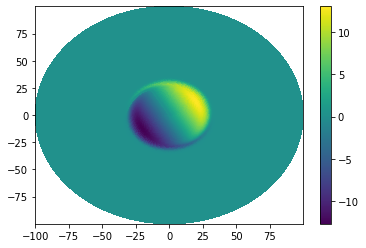

In [21]:
plt.pcolor(x_w[:,:,25], y_w[:,:,25], z_w[:,:,25])
plt.colorbar()

/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


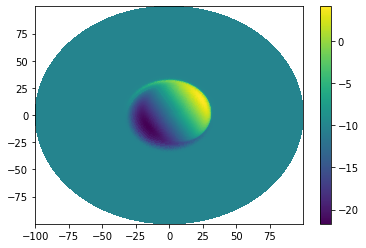

In [22]:
plt.pcolor(x_w[:,:,0], y_w[:,:,0], z_w[:,:,0])
plt.colorbar()

/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


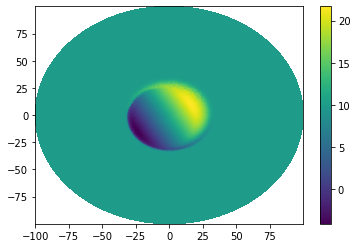

In [23]:
plt.pcolor(x_w[:,:,-1], y_w[:,:,-1], z_w[:,:,-1])
plt.colorbar()

In [24]:
theta = np.deg2rad(89)

#x_w[(x_w < 1) & (x_w > -1)] = np.abs(x_w[(x_w < 1) & (x_w > -1)])


tdiskY = (y_w*np.cos(theta) - z_w*np.sin(theta))
tdiskZ = (y_w*np.sin(theta) + z_w*np.cos(theta))

#x_w[(x_w < 1) & (x_w > -11)] = 0
#tdiskY[(tdiskY < 1) & (tdiskY > -1)] = np.abs(tdiskY[(tdiskY < 1) & (tdiskY > -1)])
#tdiskZ[(tdiskZ < 1) & (tdiskZ > -1)] = np.abs(tdiskZ[(tdiskZ < 1) & (tdiskZ > -1)])

/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


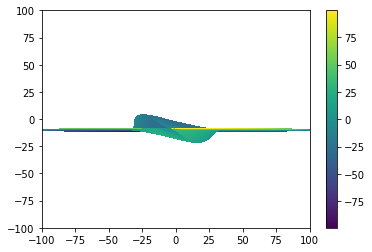

In [25]:
plt.pcolor(x_w[:,:,-1], tdiskY[:,:,-1], tdiskZ[:,:,-1])
#plt.pcolor(x_w[:,:,-1], tdiskY[:,:,-1], tdiskZ[:,:,-1])
#plt.pcolor(x_w[:,:,-1], tdiskY[:,:,-1], tdiskZ[:,:,-1])
#plt.pcolor(x_w[:,:,25], tdiskY[:,:,25], tdiskZ[:,:,25])
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.colorbar()

In [ ]:
#I still don't know what's going on with the discrete break in azimuth... I guess I should try original version?

a 10
r0 30
dr 0
r max100.0
r min10.0
a 120
r0 30
dr 0
r max100.0
r min10.0
warp.shape(200, 1)
twist.shape(200, 1)


/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in true_divide
/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


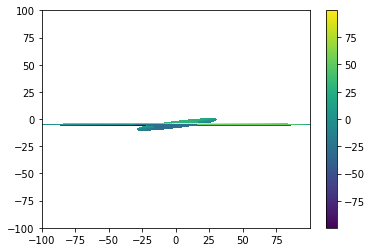

/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


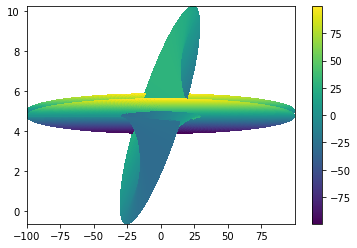

/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


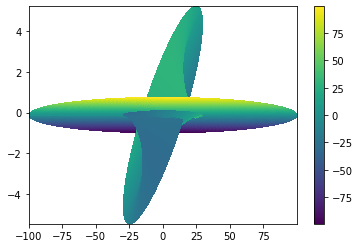

In [88]:
#For now, experimenting with z-warping
a_l = np.linspace(10, 100, 200)
p_l = np.linspace(-np.pi, np.pi, 200)
z_l = np.linspace(-5, 5, 40)

a, p, z = np.meshgrid(a_l, p_l, z_l)

w_i = 10
pa_w =120
warp_i  = w_func(a_l, type="w", r0=30, dr = 0, w_i=w_i, pa=pa_w)
twist_i = w_func(a_l, type="pa", r0=30, dr = 0, w_i=w_i, pa=pa_w)

#p[p<np.pi/20] = 

x, y = pol2cart(a, p)

x_w, y_w, z_w = matrix_mine(x, y, z, warp_i, twist_i, np.deg2rad(0),np.deg2rad(0))

theta = np.deg2rad(89.5)

#x_w[(x_w < 1) & (x_w > -1)] = np.abs(x_w[(x_w < 1) & (x_w > -1)])


tdiskY = (y_w*np.cos(theta) - z_w*np.sin(theta))
tdiskZ = (y_w*np.sin(theta) - z_w*np.cos(theta))

plt.pcolor(x_w[:,:,-1], tdiskY[:,:,-1], tdiskZ[:,:,-1])
#plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.colorbar()
plt.show()

plt.pcolor(x_w[:,:,-0], tdiskY[:,:,-0], tdiskZ[:,:,0])
plt.pcolor(x_w[:,:,1], tdiskY[:,:,1], tdiskZ[:,:,1])
#plt.xlim(-100, 100)
#plt.ylim(0, 40)
plt.colorbar()
plt.show()
#plt.pcolor(x_w[:,:,-1], tdiskY[:,:,-1], tdiskZ[:,:,-1])
#plt.pcolor(x_w[:,:,25], tdiskY[:,:,25], tdiskZ[:,:,25])

plt.pcolor(x_w[:,:,20], tdiskY[:,:,20], tdiskZ[:,:,20])
#plt.xlim(-100, 100)
#plt.ylim(0, 40)
plt.colorbar()
plt.show()

In [92]:
def apply_matrix2d_d(p0, warp, twist, inc_, PA_):
    inc_ = 0
    x = p0[:, :, 0]
    y = p0[:, :, 1]
    z = p0[:, :, 2]

    plt.pcolor(x, y, z)
    plt.title("z apply matrix input")
    plt.colorbar()
    plt.show()


    warp = warp[:, None]
    print("warp.shape" + str(warp.shape))
    twist = twist[:, None]
    print("twist.shape" + str(twist.shape))

    cosw = np.cos(warp)
    sinw = np.sin(warp)

    cost = np.cos(twist)
    sint = np.sin(twist)

    cosPA = np.cos(PA_)
    sinPA = np.sin(PA_)

    cosi = np.cos(inc_)
    sini = np.sin(inc_)

    xp = x*(-sinPA*sint*cosi + cosPA*cost) + y*((-sinPA*cosi*cost - sint*cosPA)*cosw + sinPA*sini*sinw) + z*(-(-sinPA*cosi*cost - sint*cosPA)*sinw + sinPA*sini*cosw)
    yp = x*(sinPA*cost + sint*cosPA*cosi) + y*((-sinPA*sint + cosPA*cosi*cost)*cosw - sini*sinw*cosPA) + z*(-(-sinPA*sint + cosPA*cosi*cost)*sinw - sini*cosPA*cosw)
    zp = x*sini*sint + y*(sini*cost*cosw + sinw*cosi) + z*(-sini*sinw*cost + cosi*cosw)

    plt.pcolor(xp, yp, zp)
    plt.title("matrix output")
    plt.colorbar()
    plt.show()

    return np.moveaxis([xp, yp, zp], 0, 2)

a 10
r0 30
dr 0
r max100.0
r min10.0
[0.17453293 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293
 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293
 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293
 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293
 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293
 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293
 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293 0.17453293
 0.17453293 0.17453293 0.17453293 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        

/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in true_divide
/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


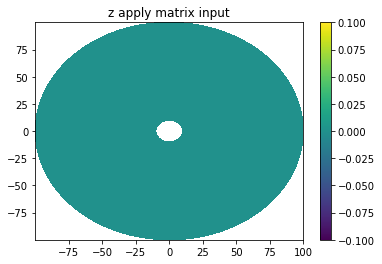

warp.shape(200, 1)
twist.shape(200, 1)


/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


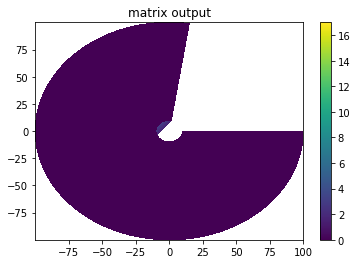

/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


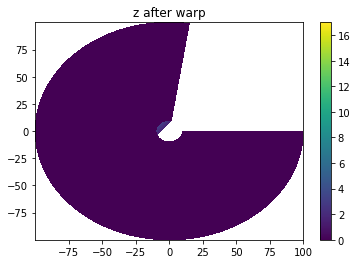

In [94]:

a_l = np.linspace(10, 100, 200)
#p_l = np.linspace(-np.pi, np.pi, 200)
p_l = np.linspace(0, 2*np.pi, 200)
z_l = np.linspace(0, 5, 40)

a, p, z = np.meshgrid(a_l, p_l, z_l)

w_i = 10
pa_w =120
warp_i  = w_func(a_l, type="w", r0=30, dr = 0, w_i=w_i, pa=pa_w)
print(warp_i)
twist_i = w_func(a_l, type="pa", r0=30, dr = 0, w_i=w_i, pa=pa_w)


'''need cartesian system for warp rotation'''
xi = a[:,:,0] * np.cos(p[:,:,0])
#print(xi.shape)
yi = a[:,:,0] * np.sin(p[:,:,0])


points_i = np.moveaxis([xi, yi, z[:,:,0]], 0, 2)
print("set structure points_i.shape" + str(points_i.shape))

'''applying warp via rotational matrix'''
rotation = apply_matrix2d_d(points_i, warp_i, twist_i, 0, 0)
#velocity = apply_matrix2d_d(vkep_i, warp_i, twist_i, inc_obs, PA_obs)
#self.rotation = rotation
'''now we have warped disk, rotation is a a stack of 3 2d array with[:,:,0]=x coord, [:,:,1]=y coord, [:,;,2]=z coord'''
        

plt.pcolor(rotation[:,:,0], rotation[:,:,1], rotation[:,:,2])
plt.title("z after warp")
plt.colorbar()
plt.show()
'''now to make 3d grid:'''

'''saving these because I think I can use them in rt grid'''
x_grid = rotation[:,:,0]
y_grid = rotation[:,:,1]
z_grid = rotation[:,:,2]

'''keeping z grid, adding each point in zf to each slice
this doesn't perfectly replicate geoemetry of warp: 
I think we would need to apply a rotational matrix to each z slice'''

z_full_grid = z_grid[:,:,np.newaxis] + z_l
'''translating x &y grids back to polar coordinates'''


'''converting back to polar coordinates'''
r_grid, f_grid = cart2pol(rotation[:,:,0], rotation[:,:,1])

'''making r & phi grid 3d along z axis'''

'''this is maybe where the plus one offset is coming from..? might need 
to multply not add'''
#r_full_grid = r_grid[:,:, np.newaxis]+np.ones(len(zf))
#f_full_grid = f_grid[:,:, np.newaxis]+np.ones(len(zf))

r_full_grid = r_grid[:,:, np.newaxis]*np.ones(len(z_l))
f_full_grid = f_grid[:,:, np.newaxis]*np.ones(len(z_l))


In [ ]:
plt.plot()